<a href="https://colab.research.google.com/github/armykongtap/DataSci/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

#### Create a series

In [0]:
name = pd.Series(['Adam','Bob','Dave','Emily'])

In [3]:
name

0     Adam
1      Bob
2     Dave
3    Emily
dtype: object

In [4]:
name.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
name.values

array(['Adam', 'Bob', 'Dave', 'Emily'], dtype=object)

In [6]:
name

0     Adam
1      Bob
2     Dave
3    Emily
dtype: object

In [7]:
name[0]

'Adam'

In [0]:
age = pd.Series([15,16,16,15])

In [9]:
age

0    15
1    16
2    16
3    15
dtype: int64

In [0]:
age.index = name

In [11]:
age.index

Index(['Adam', 'Bob', 'Dave', 'Emily'], dtype='object')

In [12]:
age

Adam     15
Bob      16
Dave     16
Emily    15
dtype: int64

In [13]:
age['Adam']

15

#### Create a dataframe

In [0]:
name = pd.Series(['Adam','Bob','Dave','Emily'])
age = pd.Series([15,16,16,15])
gender = pd.Series(['M','M','M','F'])
students = pd.DataFrame({'Name':name, 'Age':age, 'Gender':gender})

In [15]:
students

,Name,Age,Gender
0,Adam,15,M
1,Bob,16,M
2,Dave,16,M
3,Emily,15,F


In [0]:
students = pd.DataFrame({'Name':['Adam','Bob','Dave','Emily'], 
                         'Age':[15,16,16,15], 
                         'Gender':['M','M','M','F']})

In [17]:
students

,Name,Age,Gender
0,Adam,15,M
1,Bob,16,M
2,Dave,16,M
3,Emily,15,F


#### Index

In [0]:
students.index = students['Name']

In [19]:
students

,Name,Age,Gender
Name,,,
Adam,Adam,15,M
Bob,Bob,16,M
Dave,Dave,16,M
Emily,Emily,15,F


In [0]:
students.set_index('Name', inplace=True)

In [21]:
students

,Age,Gender
Name,,
Adam,15,M
Bob,16,M
Dave,16,M
Emily,15,F


#### Indexing

In [22]:
students['Age']

Name
Adam     15
Bob      16
Dave     16
Emily    15
Name: Age, dtype: int64

In [23]:
students.loc['Adam']

Age       15
Gender     M
Name: Adam, dtype: object

In [24]:
students.iloc[0]

Age       15
Gender     M
Name: Adam, dtype: object

In [25]:
students.loc['Adam','Age']

15

In [26]:
students[['Age','Gender']]

,Age,Gender
Name,,
Adam,15,M
Bob,16,M
Dave,16,M
Emily,15,F


In [27]:
students.loc[['Adam','Bob']]

,Age,Gender
Name,,
Adam,15,M
Bob,16,M


In [28]:
students.iloc[0:2]

,Age,Gender
Name,,
Adam,15,M
Bob,16,M


In [29]:
students.loc[['Adam','Bob'],['Gender','Age']]

,Gender,Age
Name,,
Adam,M,15
Bob,M,16


#### Adding rows

In [0]:
students.loc['Fred'] = [16, 'M']

In [31]:
students

,Age,Gender
Name,,
Adam,15,M
Bob,16,M
Dave,16,M
Emily,15,F
Fred,16,M


In [32]:
students2 = pd.DataFrame({'Age':[16,15], 
                         'Gender':['F','M']}, index=['Grace', 'Henry'])
students2

,Age,Gender
Grace,16,F
Henry,15,M


In [0]:
students = students.append(students2)

In [34]:
students

,Age,Gender
Adam,15,M
Bob,16,M
Dave,16,M
Emily,15,F
Fred,16,M
Grace,16,F
Henry,15,M


#### Add a column

In [0]:
students['Height'] = [170, 167, 172, 163, 165, 158, 175]

In [36]:
students

,Age,Gender,Height
Adam,15,M,170
Bob,16,M,167
Dave,16,M,172
Emily,15,F,163
Fred,16,M,165
Grace,16,F,158
Henry,15,M,175


#### Remove rows or columns

In [37]:
students.drop(['Bob','Grace'])

,Age,Gender,Height
Adam,15,M,170
Dave,16,M,172
Emily,15,F,163
Fred,16,M,165
Henry,15,M,175


In [38]:
students.drop(['Age','Height'], axis=1)

,Gender
Adam,M
Bob,M
Dave,M
Emily,F
Fred,M
Grace,F
Henry,M


## Analyzing IMDb Movies Data

In [0]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/armykongtap/DataSci/master/IMDB_Movie_Data.csv')

In [40]:
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [41]:
movies_df = movies_df.set_index("Title")
movies_df.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [42]:
movies_df = movies_df.reset_index()
movies_df.head(2)

,Title,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [0]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/armykongtap/DataSci/master/IMDB_Movie_Data.csv', index_col='Title')

In [44]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [45]:
movies_df.shape

(1000, 11)

In [46]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


#### Rename columns

In [47]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [0]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue'
    }, inplace=True)

In [49]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

#### Select columns

In [50]:
type(movies_df['Genre'])

pandas.core.series.Series

In [51]:
movies_df['Genre']

Title
Guardians of the Galaxy     Action,Adventure,Sci-Fi
Prometheus                 Adventure,Mystery,Sci-Fi
Split                               Horror,Thriller
Sing                        Animation,Comedy,Family
Suicide Squad              Action,Adventure,Fantasy
                                     ...           
Secret in Their Eyes            Crime,Drama,Mystery
Hostel: Part II                              Horror
Step Up 2: The Streets          Drama,Music,Romance
Search Party                       Adventure,Comedy
Nine Lives                    Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [52]:
type(movies_df[['Genre']])

pandas.core.frame.DataFrame

In [53]:
type(movies_df[['Genre','Rating']])

pandas.core.frame.DataFrame

In [54]:
movies_df[['Genre','Rating']]

,Genre,Rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2
...,...,...
Secret in Their Eyes,"Crime,Drama,Mystery",6.2
Hostel: Part II,Horror,5.5
Step Up 2: The Streets,"Drama,Music,Romance",6.2


#### Select rows

In [55]:
type(movies_df.loc["Prometheus"])

pandas.core.series.Series

In [56]:
movies_df.loc["Prometheus"]

Rank                                                           2
Genre                                   Adventure,Mystery,Sci-Fi
Description    Following clues to the origin of mankind, a te...
Director                                            Ridley Scott
Actors         Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                        2012
Runtime                                                      124
Rating                                                         7
Votes                                                     485820
Revenue                                                   126.46
Metascore                                                     65
Name: Prometheus, dtype: object

In [57]:
type(movies_df.loc[["Prometheus"]])

pandas.core.frame.DataFrame

In [58]:
type(movies_df.loc[["Prometheus","Suicide Squad"]])

pandas.core.frame.DataFrame

In [59]:
movies_df.loc[["Prometheus","Suicide Squad"]]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


#### Select rows and columns

In [60]:
movies_df.loc[["Prometheus","Suicide Squad"],["Genre","Rating"]]

,Genre,Rating
Title,,
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Suicide Squad,"Action,Adventure,Fantasy",6.2


In [61]:
movies_df.iloc[[1,4],[1,7]]

,Genre,Rating
Title,,
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Suicide Squad,"Action,Adventure,Fantasy",6.2


#### Missing data

In [62]:
movies_df.isnull()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [63]:
movies_df.isnull().sum()

Rank             0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

In [64]:
movies_df.fillna(0).isnull().sum()

Rank           0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

In [65]:
movies_df.fillna(0).shape

(1000, 11)

In [0]:
movies_df2 = movies_df.dropna()

In [67]:
movies_df2.shape

(838, 11)

In [0]:
movies_df.dropna(inplace=True)

In [69]:
movies_df.shape

(838, 11)

#### Statistics functions

In [70]:
movies_df.mean()

Rank            485.247017
Year           2012.507160
Runtime         114.638425
Rating            6.814320
Votes        193230.251790
Revenue          84.564558
Metascore        59.575179
dtype: float64

In [71]:
movies_df.quantile(0.25)

Rank           238.2500
Year          2010.0000
Runtime        101.0000
Rating           6.3000
Votes        61276.5000
Revenue         13.9675
Metascore       47.0000
Name: 0.25, dtype: float64

In [72]:
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [73]:
movies_df[["Genre","Description","Director","Actors"]].describe()

,Genre,Description,Director,Actors
count,838,838,838,838
unique,189,838,524,834
top,"Action,Adventure,Sci-Fi",Theseus is a mortal man chosen by Zeus to lead...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,50,1,8,2


In [74]:
movies_df.select_dtypes("object").describe()

,Genre,Description,Director,Actors
count,838,838,838,838
unique,189,838,524,834
top,"Action,Adventure,Sci-Fi",Theseus is a mortal man chosen by Zeus to lead...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,50,1,8,2


#### Conditional selection

In [75]:
movies_df['Director']=="Ridley Scott"

Title
Guardians of the Galaxy     False
Prometheus                   True
Split                       False
Sing                        False
Suicide Squad               False
                            ...  
Resident Evil: Afterlife    False
Project X                   False
Hostel: Part II             False
Step Up 2: The Streets      False
Nine Lives                  False
Name: Director, Length: 838, dtype: bool

In [76]:
movies_df[movies_df['Director']=="Ridley Scott"]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [77]:
movies_df[movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [78]:
movies_df[movies_df['Rating'] >= 9]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [79]:
movies_df[
    ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010))
    & (movies_df['Rating'] > 8.0)
    & (movies_df['Revenue'] < movies_df['Revenue'].quantile(0.25))
]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


#### apply()

In [0]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

In [81]:
movies_df["Rating"].apply(rating_function)

Title
Guardians of the Galaxy     good
Prometheus                   bad
Split                        bad
Sing                         bad
Suicide Squad                bad
                            ... 
Resident Evil: Afterlife     bad
Project X                    bad
Hostel: Part II              bad
Step Up 2: The Streets       bad
Nine Lives                   bad
Name: Rating, Length: 838, dtype: object

In [0]:
movies_df["Rating_category"] = movies_df["Rating"].apply(rating_function)

In [83]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


In [84]:
movies_df["Rating_category"] = movies_df["Rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


#### apply() with a lambda function

In [0]:
movies_df["Actors"] = movies_df["Actors"].apply(lambda x: x.split(sep=','))

In [86]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael...",2012,124,7.0,485820,126.46,65.0,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric...",2016,117,7.3,157606,138.12,62.0,bad
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth...",2016,108,7.2,60545,270.32,59.0,bad
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Vio...",2016,123,6.2,393727,325.02,40.0,bad


In [87]:
movies_df[movies_df['Actors'].apply(lambda x: "Chris Pratt" in x)]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",2014,121,8.1,757074,333.13,76.0,good
Jurassic World,86,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"[Chris Pratt, Bryce Dallas Howard, Ty Simpki...",2015,124,7.0,455169,652.18,59.0,bad
The Lego Movie,385,"Animation,Action,Adventure","An ordinary Lego construction worker, thought ...",Phil Lord,"[Chris Pratt, Will Ferrell, Elizabeth Banks,...",2014,100,7.8,266508,257.76,83.0,bad


#### sort

In [88]:
movies_df.sort_values(by="Title").head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_category
Title,,,,,,,,,,,,
(500) Days of Summer,508,"Comedy,Drama,Romance",An offbeat romantic comedy about a woman who d...,Marc Webb,"[Zooey Deschanel, Joseph Gordon-Levitt, Geof...",2009,95,7.7,398972,32.39,76.0,bad
10 Cloverfield Lane,119,"Drama,Horror,Mystery","After getting in a car accident, a woman is he...",Dan Trachtenberg,"[John Goodman, Mary Elizabeth Winstead, John...",2016,104,7.2,192968,71.90,76.0,bad
12 Years a Slave,112,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"[Chiwetel Ejiofor, Michael Kenneth Williams, ...",2013,134,8.1,486338,56.67,96.0,good
127 Hours,818,"Adventure,Biography,Drama",An adventurous mountain climber becomes trappe...,Danny Boyle,"[James Franco, Amber Tamblyn, Kate Mara, Se...",2010,94,7.6,294010,18.33,82.0,bad
13 Hours,169,"Action,Drama,History","During an attack on a U.S. compound in Libya, ...",Michael Bay,"[John Krasinski, Pablo Schreiber, James Badg...",2016,144,7.3,76935,52.82,48.0,bad


In [89]:
movies_df.sort_values(by=["Year","Revenue"], ascending=False).head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_category
Title,,,,,,,,,,,,
Rogue One,13,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"[Felicity Jones, Diego Luna, Alan Tudyk, Do...",2016,133,7.9,323118,532.17,65.0,bad
Finding Dory,120,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"[Ellen DeGeneres, Albert Brooks, Ed O'Neill, ...",2016,97,7.4,157026,486.29,77.0,bad
Captain America: Civil War,36,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"[Chris Evans, Robert Downey Jr., Scarlett Joh...",2016,147,7.9,411656,408.08,75.0,bad
The Secret Life of Pets,16,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"[Louis C.K., Eric Stonestreet, Kevin Hart, ...",2016,87,6.6,120259,368.31,61.0,bad
The Jungle Book,126,"Adventure,Drama,Family",After a threat from the tiger Shere Khan force...,Jon Favreau,"[Neel Sethi, Bill Murray, Ben Kingsley, Idr...",2016,106,7.5,198243,364.00,77.0,bad


#### Group by

In [90]:
groups = movies_df.reset_index().groupby("Year")
type(groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [91]:
groups.size()

Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
dtype: int64

In [92]:
groups["Revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2006,41.0,87.255610,91.913015,0.44,15.9600,53.080,133.3800,423.03
2007,44.0,93.074091,93.357106,0.04,27.7575,49.930,128.3150,336.53
2008,48.0,97.525417,98.392663,0.07,34.6450,72.985,134.5325,533.32
2009,45.0,115.742000,137.836893,0.11,21.0000,75.280,155.0200,760.51
2010,57.0,105.081579,98.022256,0.02,31.4900,90.360,148.3400,414.98
2011,57.0,93.703333,86.260893,1.74,35.0500,70.630,143.6200,380.96
2012,62.0,110.103065,117.428262,0.02,41.3350,63.660,137.8425,623.28
2013,84.0,88.084643,102.749597,0.05,15.9500,52.055,123.1500,424.65
2014,93.0,85.433656,86.528658,0.01,23.3900,50.460,124.8700,350.12


In [93]:
max_revenue_index = groups[["Revenue"]].idxmax()["Revenue"]
max_revenue_index

Year
2006     67
2007    307
2008     45
2009     76
2010    594
2011    100
2012     65
2013    502
2014    296
2015     41
2016     11
Name: Revenue, dtype: int64

In [94]:
movies_df.iloc[max_revenue_index,]["Year"]

Title
Pirates of the Caribbean: Dead Man's Chest      2006
Spider-Man 3                                    2007
The Dark Knight                                 2008
Avatar                                          2009
Toy Story 3                                     2010
Harry Potter and the Deathly Hallows: Part 2    2011
The Avengers                                    2012
The Hunger Games: Catching Fire                 2013
American Sniper                                 2014
Star Wars: Episode VII - The Force Awakens      2015
Rogue One                                       2016
Name: Year, dtype: int64

#### Plot

In [0]:
import matplotlib.pyplot as plt

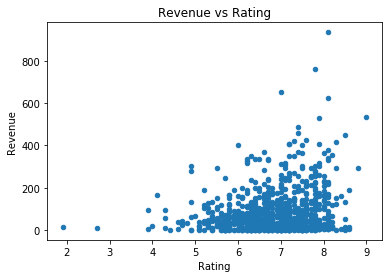

In [96]:
movies_df.plot(kind='scatter', x='Rating', y='Revenue', title='Revenue vs Rating');

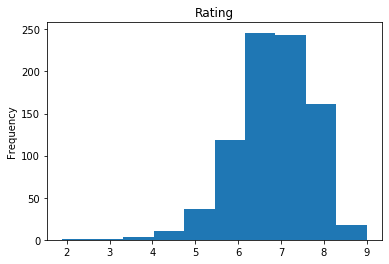

In [97]:
movies_df['Rating'].plot(kind='hist', title='Rating');